In [31]:
#liczba odleglosci 
#wyznaczamy przynaleznosc -argmn
#liczymy nowe srodki - mean
# np.linalg.inv() 

In [ ]:
import numpy as np

#zad1

def distp(X,C):
    LpunktowX = X.shape[0]
    LpunktowC = C.shape[0]

    o = np.zeros((LpunktowX,LpunktowC)) #odleglosc

    for i in range(LpunktowX):
        for j in range(LpunktowC):
            r = X[i]-C[j] #roznica
            o = np.sqrt(np.dot(r,r))
    return o

def distm(X,C,V):
    LpunktowX = X.shape[0]
    LpunktowC = C.shape[0]
    inv = np.linalg.inv(V)

    o = np.zeros((LpunktowX,LpunktowC)) #odleglosc
    for i in range(LpunktowX):
        for j in range(LpunktowC):
            r = X[i]-C[j] #roznica
            o = np.sqrt(np.dot(np.dot(r, inv), r))

    return o

def ksrodki(X, k):

    n, d = X.shape
    i = np.random.choice(n, size=k)  
    e = np.random.normal(scale=0.01, size=(k, d))
    CX = X[i]  
    C = CX + e

    return C, CX

# X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
# k = 2
# C, CX = ksrodki(X, k)
# print(C)
# print(CX)


# X = np.array([[1, 2], [2, 3], [3, 4]])  
# C = np.array([[2, 2], [3, 3]])  
# V = np.array([[1, 0.5], [0.5, 1]])  
# d = distm(X, C, V)
# d1 = distp(X, C)
# print(f"distm(X,C,V):",d)
# print(f"distp(X,C):",d1)




[[1.01263459 1.99599275]
 [2.99289762 4.00119738]]
[[1 2]
 [3 4]]


Xs.shape:  (160, 17)


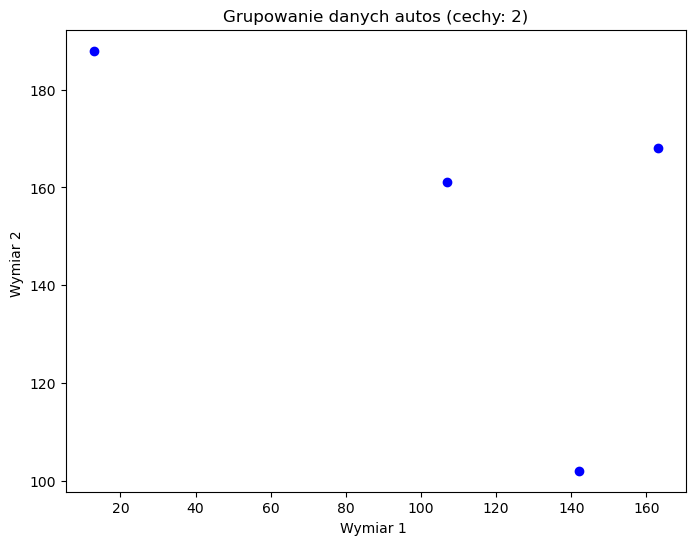

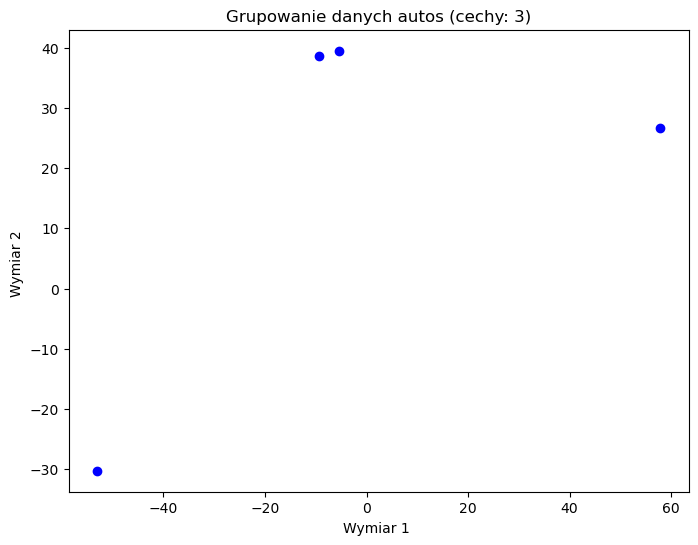

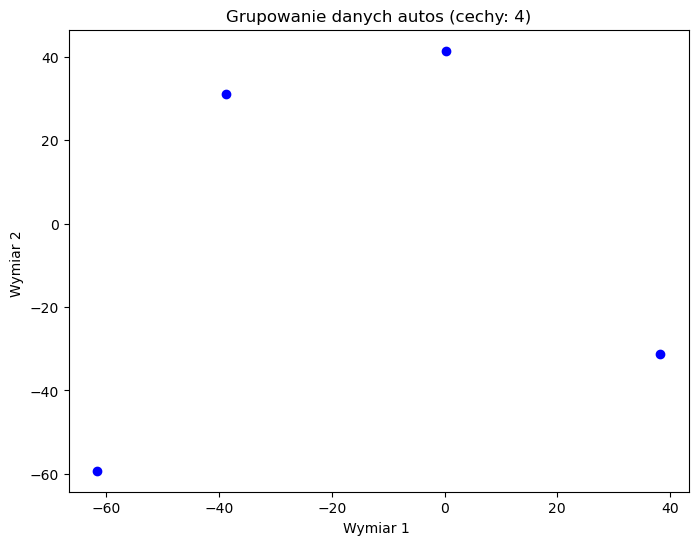

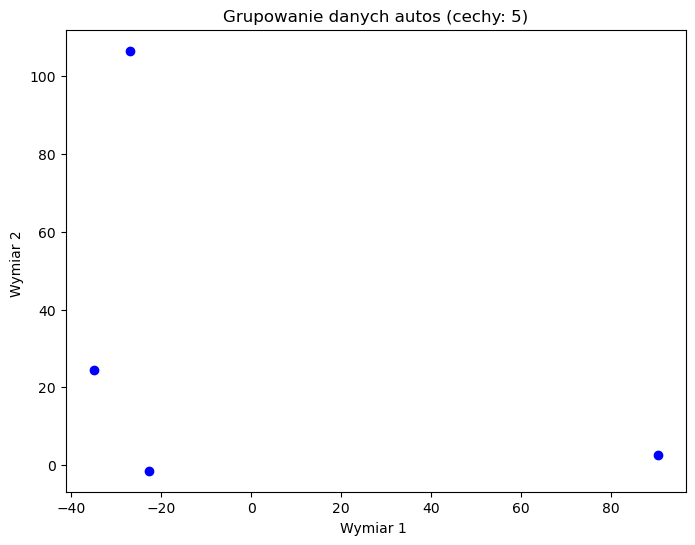

In [62]:
#zad2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv('autos.csv')
df = df.dropna()  
df = df.select_dtypes(include=[np.number])
ks = [2,3,4,5]
k = 4
Xs = df.to_numpy()

print(f"Xs.shape: ",Xs.shape)

for cechy in ks:

    X = Xs[:, 0:cechy]
    V = np.cov(X.T)
    C, CX = ksrodki(X, k)
    dm = distm(X, C, V)
    dp = distp(X, C)

    # print(f"dm.shape: ",dm.shape)
    # print(f"dp.shape: ",dp.shape)

    if cechy > 2:
        pca = PCA(n_components=2)
        Xplot = pca.fit_transform(X)
        Cplot = pca.transform(C)
    else:
        Xplot = X
        Cplot = C


    plt.figure(figsize=(8, 6))
    plt.scatter(Cplot[:, 0], Cplot[:, 1], c='blue')
    plt.title(f"Grupowanie danych autos (cechy: {cechy})")
    plt.xlabel("Wymiar 1 ")
    plt.ylabel("Wymiar 2 ")
    plt.show()
        